# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data

In [2]:
df=pd.read_csv("Energy_consumption_dataset.csv")

In [3]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


# Features and Target 

In [4]:
X = df[["Temperature", "Humidity", "SquareFootage", "RenewableEnergy"]]
y = df["EnergyConsumption"]  

# Spliting dataset(Train and Test)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing or making polynomial features

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model 

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train_poly, y_train)

LinearRegression()

# Predict the Model

In [19]:
y_pred = model.predict(X_test_poly)

In [20]:
pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred,"residuals":(y_test-y_pred)}).head()

,Y_test,Y_pred,residuals
1501,84.778571,74.254014,10.524557
2586,62.777773,82.834685,-20.056911
2653,85.231391,76.421599,8.809792
1055,94.525334,84.535670,9.989665
705,75.312838,70.215597,5.097241


# Evaluating The model

In [22]:
from sklearn import metrics

In [23]:
MAE_poly=metrics.mean_absolute_error(y_test,y_pred)
MSE_poly=metrics.mean_squared_error(y_test,y_pred)
RMSE_poly=np.sqrt(MSE_poly)

pd.DataFrame([MAE_poly,MSE_poly,RMSE_poly],index=["MAE","MSE","RMSE"],columns=["metrics"])

,metrics
MAE,6.330581
MSE,63.143227
RMSE,7.946271


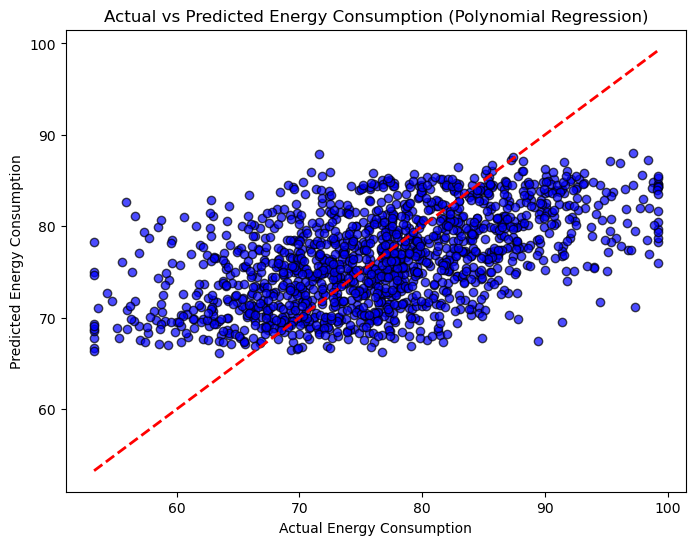

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Energy Consumption (Polynomial Regression)")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

# comparing of simple linear regression with polynomial regression

In [24]:
XS_train,XS_test,ys_train,ys_test=train_test_split(X,y,test_size=0.3,random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train,ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple=metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple=metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple=np.sqrt(MSE_simple)

In [25]:
pd.DataFrame({"Poly_metrics":[MAE_poly,MSE_poly,RMSE_poly],"Simple_metrics":[MAE_simple,MSE_simple,RMSE_simple]},
             index=["MAE","MSE","RMSE"])

,Poly_metrics,Simple_metrics
MAE,6.330581,6.163813
MSE,63.143227,60.766335
RMSE,7.946271,7.795276


# adjusting model paramtres

In [27]:
train_RMSE_list=[]
test_RMSE_list=[]

for d in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    polymodel=LinearRegression()
    polymodel.fit(X_train,y_train)
    
    y_pred_train=polymodel.predict(X_train)
    y_pred_test=polymodel.predict(X_test)
    
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    
    train_RMSE_list.append(train_RMSE)
    
    test_RMSE_list.append(test_RMSE)   

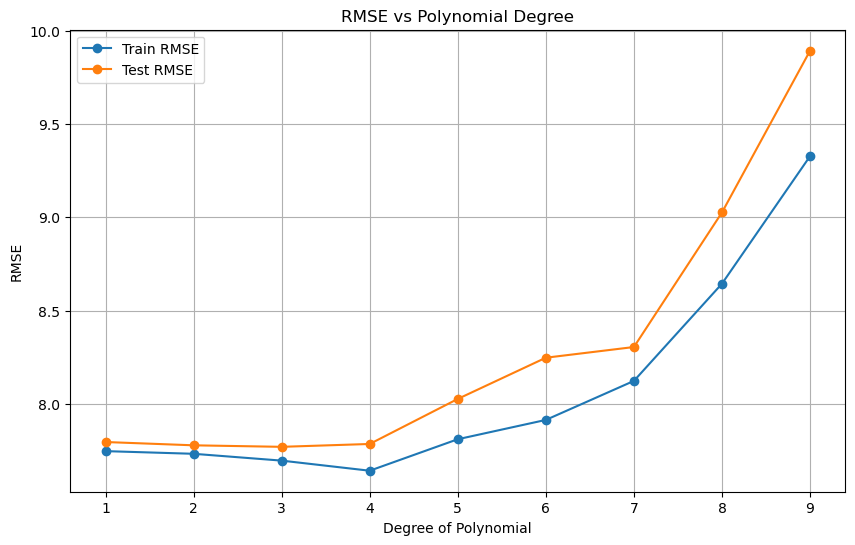

In [29]:
import matplotlib.pyplot as plt

degrees = range(1, 10)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_RMSE_list, label="Train RMSE", marker='o')
plt.plot(degrees, test_RMSE_list, label="Test RMSE", marker='o')
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.legend()
plt.grid()
plt.show()



In [ ]:
#after 5 ==> overfitting
# 3 or 4 is better

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 2. تبدیل ویژگی‌ها به چندجمله‌ای با درجه 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. ساخت و آموزش مدل
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# 4. پیش‌بینی روی داده‌های تست
y_pred = poly_model.predict(X_test_poly)

# 5. ارزیابی مدل
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

# 6. نمایش نتایج ارزیابی
print("Final Model Evaluation:")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)
print("R2 Score:", R2)



Final Model Evaluation:
Mean Absolute Error (MAE): 6.13290987871503
Mean Squared Error (MSE): 60.36525313608165
Root Mean Squared Error (RMSE): 7.769507908232133
R2 Score: 0.27667715510179647


In [41]:
results_df = pd.DataFrame({"Y_test": y_test.values, "Y_pred": y_pred, "Residuals": y_test.values - y_pred})
results_df.head()

,Y_test,Y_pred,Residuals
0,77.298443,72.306726,4.991716
1,75.175410,81.704792,-6.529383
2,86.433092,82.849755,3.583337
3,79.826382,67.287409,12.538973
4,91.871965,85.099197,6.772767


In [42]:
# ساخت DataFrame مقایسه
comparison_df = pd.DataFrame(
    {
        "Poly_metrics": [MAE, MSE, RMSE],  
        "Simple_metrics": [MAE_simple, MSE_simple, RMSE_simple],  
    },
    index=["MAE", "MSE", "RMSE"],  # نام شاخص‌ها
)

# نمایش دیتافریم
comparison_df.head()


,Poly_metrics,Simple_metrics
MAE,6.132910,6.163813
MSE,60.365253,60.766335
RMSE,7.769508,7.795276


# Finalizing model paramtres

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. تبدیل ویژگی‌ها به چندجمله‌ای با درجه 3
final_polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
final_polynomial_features = final_polynomial_converter.fit_transform(X)

# 2. تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(final_polynomial_features, y, test_size=0.3, random_state=101)

# 3. ساخت و آموزش مدل
final_poly_model = LinearRegression()
final_poly_model.fit(X_train, y_train)

# 4. پیش‌بینی روی داده‌های تست
y_pred = final_poly_model.predict(X_test)

# 5. ارزیابی مدل
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

# نمایش نتایج ارزیابی
print("Final Model Evaluation:")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)
print("R2 Score:", R2)


Final Model Evaluation:
Mean Absolute Error (MAE): 6.13290987871503
Mean Squared Error (MSE): 60.36525313608165
Root Mean Squared Error (RMSE): 7.769507908232133
R2 Score: 0.27667715510179647


In [44]:
results_df = pd.DataFrame({"Y_test": y_test.values, "Y_pred": y_pred, "Residuals": y_test.values - y_pred})

results_df.head()




,Y_test,Y_pred,Residuals
0,77.298443,72.306726,4.991716
1,75.175410,81.704792,-6.529383
2,86.433092,82.849755,3.583337
3,79.826382,67.287409,12.538973
4,91.871965,85.099197,6.772767


# Saving Model

In [45]:
from joblib import dump, load

In [48]:
dump(final_poly_model,r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\5-Polynomial regression\New folder\Smart.joblib")

['C:\\Users\\ASUS\\Desktop\\AIoT\\domain-datasets\\5-Polynomial regression\\New folder\\Smart.joblib']

In [49]:
dump(final_polynomial_converter,r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\5-Polynomial regression\New folder\coverting_s.joblib")

['C:\\Users\\ASUS\\Desktop\\AIoT\\domain-datasets\\5-Polynomial regression\\New folder\\coverting_s.joblib']

# Loading

In [50]:
load_converter=load(r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\5-Polynomial regression\New folder\coverting_s.joblib")

In [51]:
load_polymodel=load(r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\5-Polynomial regression\New folder\Smart.joblib")

In [52]:
new_data = [[25, 55, 1500, 100]] 

In [53]:
data_poly=load_converter.transform(new_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [54]:
load_polymodel.predict(data_poly)

array([290.61805953])